In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Lasso



%matplotlib inline
sns.set()

pd.set_option('display.max_columns', None)

In [2]:
pop = ['new_confirmed',
       'new_deceased',
       'population_age_00_09',
       'population_age_10_19',
       'population_age_20_29',
       'population_age_30_39',
       'population_age_40_49',
       'population_age_50_59',
       'population_age_60_69',
       'population_age_70_79',
       'population_age_80_and_older',
       'cumulative_persons_fully_vaccinated',
    ]
pd.DataFrame(pop, columns=["features"])

,features
0,new_confirmed
1,new_deceased
2,population_age_00_09
3,population_age_10_19
4,population_age_20_29
5,population_age_30_39
6,population_age_40_49
7,population_age_50_59
8,population_age_60_69
9,population_age_70_79


In [3]:
def clean(df, additional_features=[]):
    # calculate percentage of population related columns over population
    population_features = ['new_confirmed',
                           'new_deceased',
                           'population_age_00_09',
                           'population_age_10_19',
                           'population_age_20_29',
                           'population_age_30_39',
                           'population_age_40_49',
                           'population_age_50_59',
                           'population_age_60_69',
                           'population_age_70_79',
                           'population_age_80_and_older',
                           'cumulative_persons_fully_vaccinated',
                           ]
    for p in population_features:
        df[p] = 100*df[p]/df['population']
    for a in additional_features:
        df[a] = 100*df[a]/df['population']
        

    # get numerical columns
    df = df.sort_values(by=['date', 'location_key'])
    df = df.select_dtypes(include=[np.number])

    good_cols = []
    # remove irrelevant features or leakage
    exclude = ['population',
               'openstreetmap_id',
               'latitude', 
               'longitude',
               'elevation_m',
               'area_sq_km',
               'cumulative_confirmed',
               'cumulative_deceased',
               'cumulative_tested',
               'cumulative_vaccine_doses_administered',
               'new_persons_vaccinated',
               'new_persons_fully_vaccinated',
               'population_male',
               'population_female',
               'new_hospitalized_patients',
               'cumulative_hospitalized_patients', 
               'current_hospitalized_patients',
               'current_intensive_care_patients',
               'new_vaccine_doses_administered',
               'new_persons_fully_vaccinated_pfizer',
               'new_vaccine_doses_administered_pfizer',
               'new_persons_fully_vaccinated_moderna',
               'new_vaccine_doses_administered_moderna',
               'new_persons_fully_vaccinated_janssen',
               'new_vaccine_doses_administered_janssen',
               'cumulative_persons_fully_vaccinated_pfizer',
               'cumulative_persons_fully_vaccinated_moderna',
               'cumulative_persons_fully_vaccinated_janssen',
               'cumulative_vaccine_doses_administered_pfizer',
               'cumulative_vaccine_doses_administered_moderna',
               'cumulative_vaccine_doses_administered_janssen',
               'stringency_index'
              ]

    for col in df.columns:
        if col not in exclude and df[col].isna().sum()/len(df) <= 0.05 and col.find("search")<0:
            good_cols.append(col)

    return df[good_cols].dropna().reset_index(drop=True)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/cleaned.csv')
df = clean(df)


In [28]:
path = ('/content/gdrive/My Drive/cleaned.csv')
df = pd.read_csv(path)


In [29]:
df.head()

,location_key,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,openstreetmap_id,latitude,longitude,area_sq_km,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,stringency_index,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,dew_point,relative_humidity,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,subregion1_code,subregion1_name,new_recovered,cumulative_recovered,elevation_m,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,search_trends_abdominal_obesity,search_trends_abdominal_pain,search_trends_acne,search_trends_actinic_keratosis,search_trends_acute_bronchitis,search_trends_adrenal_crisis,search_trends_ageusia,search_trends_alcoholism,search_trends_allergic_conjunctivitis,search_trends_allergy,search_trends_amblyopia,search_trends_amenorrhea,search_trends_amnesia,search_trends_anal_fissure,search_trends_anaphylaxis,search_trends_anemia,search_trends_angina_pectoris,search_trends_angioedema,search_trends_angular_cheilitis,search_trends_anosmia,search_trends_anxiety,search_trends_aphasia,search_trends_aphonia,search_trends_apnea,search_trends_arthralgia,search_trends_arthritis,search_trends_ascites,search_trends_asperger_syndrome,search_trends_asphyxia,search_trends_asthma,search_trends_astigmatism,search_trends_ataxia,search_trends_atheroma,search_trends_attention_deficit_hyperactivity_disorder,search_trends_auditory_hallucination,search_trends_autoimmune_disease,search_trends_avoidant_personality_disorder,search_trends_back_pain,search_trends_bacterial_vaginosis,search_trends_balance_disorder,search_trends_beaus_lines,search_trends_bells_palsy,search_trends_biliary_colic,search_trends_binge_eating,search_trends_bleeding,search_trends_bleeding_on_probing,search_trends_blepharospasm,search_trends_bloating,search_trends_blood_in_stool,search_trends_blurred_vision,search_trends_blushing,search_trends_boil,search_trends_bone_fracture,search_trends_bone_tumor,search_trends_bowel_obstruction,search_trends_bradycardia,search_trends_braxton_hicks_contractions,search_trends_breakthrough_bleeding,search_trends_breast_pain,search_trends_bronchitis,search_trends_bruise,search_trends_bruxism,search_trends_bunion,search_trends_burn,search_trends_burning_chest_pain,search_trends_burning_mouth_syndrome,search_trends_candidiasis,search_trends_canker_sore,search_trends_cardiac_arrest,search_trends_carpal_tunnel_syndrome,search_trends_cataplexy,search_trends_cataract,search_trends_chancre,search_trends_cheilitis,search_trends_chest_pain,search_trends_chills,search_trends_chorea,search_trends_chronic_pain,search_trends_cirrhosis,search_trends_cleft_lip_and_cleft_palate,search_trends_clouding_of_consciousness,search_trends_cluster_headache,search_trends_colitis,search_trends_coma,search_trends_common_cold,search_trends_compulsive_behavior,search_trends_compulsive_hoarding,search_trends_confusion,search_trends_congenital_heart_defect,search_trends_conjunctivitis,search_trends_constipation,search_trends_convulsion,search_trends_cough,search_trends_crackles,search_trends_cramp,search_trends_crepitus,search_trends_croup,search_trends_cyanosis,search_tre

In [7]:
df.columns

Index(['new_confirmed', 'new_deceased', 'cumulative_persons_fully_vaccinated',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'public_transport_closing', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'debt_relief', 'public_information_campaigns', 'testing_policy',
       'contact_tracing', 'facial_coverings', 'vaccination_policy',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'dew_point', 'relative_humidity',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces

In [8]:
df.shape

(9727, 37)

In [9]:
df.iloc[0].T

new_confirmed                           0.017063
new_deceased                            0.000135
cumulative_persons_fully_vaccinated    13.530833
population_age_00_09                   15.600353
population_age_10_19                   15.037945
population_age_20_29                   17.337006
population_age_30_39                   15.337093
population_age_40_49                   13.855033
population_age_50_59                   15.717222
population_age_60_69                   11.186947
population_age_70_79                    4.742617
population_age_80_and_older             1.804093
school_closing                          2.000000
workplace_closing                       1.000000
cancel_public_events                    2.000000
restrictions_on_gatherings              4.000000
public_transport_closing                0.000000
stay_at_home_requirements               1.000000
restrictions_on_internal_movement       2.000000
international_travel_controls           3.000000
debt_relief         

In [10]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import StandardScaler


y = df.new_confirmed
df_restricted = df[[col for col in df.columns if col not in ['new_confirmed', 'new_deceased']]]
X = df_restricted

reg = Lasso(alpha=0.0007).fit(X, y)
regression_cols = df_restricted.columns[(reg.coef_!=0)]
print(len(regression_cols),regression_cols)

# raise Exception()
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X[regression_cols]), y, test_size=0.5, random_state=42)
reg = sm.OLS(y_train, X_train)
res = reg.fit()

res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


17 Index(['cumulative_persons_fully_vaccinated', 'population_age_40_49',
       'population_age_80_and_older', 'cancel_public_events', 'debt_relief',
       'contact_tracing', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'dew_point', 'relative_humidity', 'mobility_retail_and_recreation',
       'mobility_grocery_and_pharmacy', 'mobility_parks',
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          new_confirmed   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     60.66
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          3.65e-188
Time:                        22:10:16   Log-Likelihood:                 10347.
No. Observations:                4863   AIC:                        -2.066e+04
Df Residuals:                    4845   BIC:                        -2.054e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1456      0.013     11.072      0.000       0.120       0.171
cumulative_persons_fully_vaccinated     0.0002   4.25e-05      5.417      0.000       0.000       0.000
population_age_40_49                   -0.0039      0.001     -7.107      0.000      -0.005      -0.003
population_age_80_and_older            -0.0049      0.001     -6.299      0.000      -0.006      -0.003
cancel_public_events                   -0.0173      0.001    -16.407      0.000      -0.019      -0.015
debt_relief                            -0.0094      0.001     -9.985      0.000      -0.011      -0.008
contact_tracing                        -0.0044      0.001     -4.613      0.000      -0.006      -0.003
average_temperature_celsius            -0.0017      0.001     -2.882      0.004      -0.003      -0.001
minimum_temperature_celsius            -0.0003      0.000     -1.071      0.284      -0.001       0.000
maximum_temperature_celsius             0.0006      0.000      2.006      0.045    1.36e-05       0.001
dew_point                               0.0017      0.000      4.991      0.000       0.001       0.002
relative_humidity                      -0.0004      0.000     -3.808      0.000      -0.001      -0.000
mobility_retail_and_recreation         -0.0005   8.61e-05     -5.498      0.000      -0.001      -0.000
mobility_grocery_and_pharmacy           0.0006   9.06e-05      6.138      0.000       0.000       0.001
mobility_parks                      -6.588e-05   9.51e-06     -6.928      0.000   -8.45e-05   -4.72e-05
mobility_transit_stations            8.158e-05   3.59e-05      2.271      0.023    1.12e-05       0.000
mobility_workplaces                     0.0004   9.17e-05      4.194      0.000       0.000       0.001
mobility_residential                    0.0028      0.000      9.165      0.000       0.002       0.003
==============================================================================
Omnibus:                     4750.072   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368096.086
Skew:                           4.588   Prob(JB):                         0.00
Kurtosis:                      44.623   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
res.fittedvalues

6963    0.028031
975     0.013587
7879    0.022860
941     0.031945
4723    0.013355
          ...   
5734    0.035682
5191    0.020509
5390    0.040408
860     0.018824
7270    0.027847
Length: 4863, dtype: float64

<Figure size 432x288 with 0 Axes>

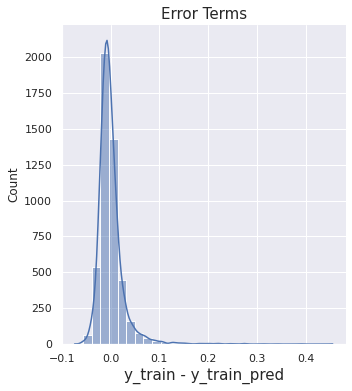

In [12]:
y_train_pred = res.predict(X_train)
pred_error = y_train - y_train_pred
pred_error
fig = plt.figure()
sns.displot(pred_error, bins=30, kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

<Figure size 432x288 with 0 Axes>

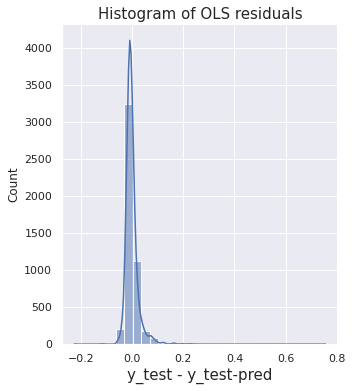

In [13]:
y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
pred_error
fig = plt.figure()
sns.displot(pred_error, bins=30, kde=True)
plt.title('Histogram of OLS residuals', fontsize = 15)
plt.xlabel('y_test - y_test-pred', fontsize = 15)
plt.show()

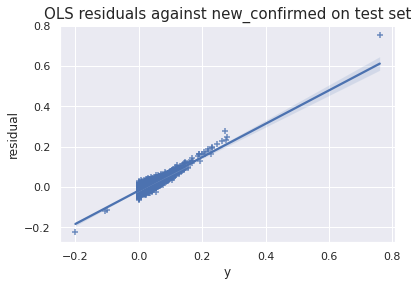

In [14]:
y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
error = pd.DataFrame()
error['y'] = y_test
error['residual'] = pred_error
sns.regplot(data=error, x="y", y="residual", marker="+")
plt.title('OLS residuals against new_confirmed on test set', fontsize = 15)
plt.show()

In [15]:
# Importing r2_square
from sklearn.metrics import r2_score

y_test_pred = res.predict(X_test)
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred )
r_squared

0.14679644981789675

In [16]:
r2_score(y_train, res.predict(X_train))

0.1754907050127058

In [17]:
y

0       0.017063
1       0.010640
2       0.003156
3       0.015217
4       0.006471
          ...   
9722    0.047143
9723    0.024280
9724    0.056301
9725    0.037548
9726    0.094570
Name: new_confirmed, Length: 9727, dtype: float64

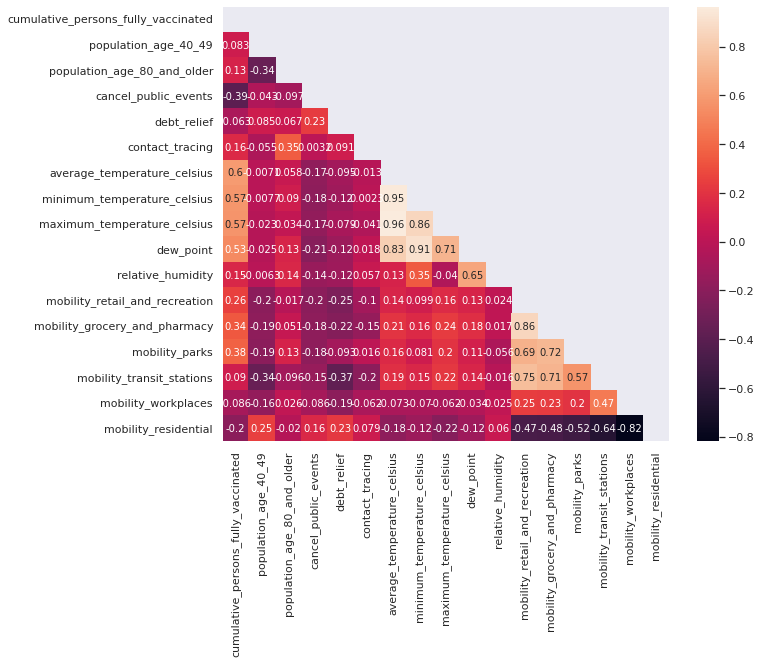

In [18]:
corr = df[regression_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True)

# Gradient Boosting Regressor

In [30]:
df = pd.read_csv(path)
new_confirmed_days = []
days = 1
df = addDays(df,days)
df = clean(df, ['y_prime'])
y = df.y_prime
df_restricted = df[[col for col in df.columns if col not in ['new_confirmed', 'new_deceased', 'y_prime']]]
X = df_restricted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: ignored

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
reg = GradientBoostingRegressor(random_state=0, **params)
res = reg.fit(X_train, y_train)
res
print(f'test set score: {res.score(X_train, y_train)}')
print(f'test set score: {res.score(X_test, y_test)}')

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
fig.suptitle('Histogram of GBR residuals')
y_train_pred = res.predict(X_train)
pred_error = y_train - y_train_pred
sns.histplot(pred_error, bins=30, ax=axes[0])
axes[0].set_xlabel('y_train - y_train-pred', fontsize = 15)
axes[0].set_title("Train set")

y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
sns.histplot(pred_error, bins=30, ax=axes[1])
axes[1].set_xlabel('y_test - y_test-pred', fontsize = 15)
axes[1].set_title("Test set")



In [ ]:
y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
sns.histplot(pred_error, bins=30, kde=True)
plt.xlabel('y_test - y_test-pred', fontsize = 15)
plt.title("Histogram of GBR residuals ")

In [ ]:
y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
error = pd.DataFrame()
error['y'] = y_test
error['residual'] = pred_error
sns.regplot(data=error, x="y", y="residual", marker="+")
plt.title('GBR residuals against new_confirmed on test set', fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, res.predict(X_test))

In [ ]:
len(res.feature_importances_)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
im = pd.DataFrame(X.columns)
im['feature_importance'] = res.feature_importances_
im.columns = ['feature', 'feature_importance']

sns.barplot(y="feature", x="feature_importance", color='salmon', data=im.sort_values(by=["feature_importance"], ascending=False)).set_title("GBR feature importance")
plt.xlim(0,1)
plt.show()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(res, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=100)

In [ ]:
res.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.01,0.04, 0.08, 0.1, 0.15, 0.2],
             'subsample'    : [0.9, 0.5, 0.2, 0.1],
             'n_estimators' : [100,200,300],
             'max_depth'    : [2,3,4]}
gbr = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 10)
grid_GBR.fit(X_train, y_train)
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

# GRB with Lasso

In [ ]:
reg = Lasso(alpha=0.00089).fit(X, y)
regression_cols = df_restricted.columns[(reg.coef_!=0)]
print(len(regression_cols),regression_cols)


# raise Exception()
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X[regression_cols]), y, test_size=0.33, random_state=42)
reg = GradientBoostingRegressor(random_state=0)
res = reg.fit(X_train, y_train)
res

In [ ]:
print(f'test set score: {res.score(X_train, y_train)}')
print(f'test set score: {res.score(X_test, y_test)}')

In [ ]:
mean_squared_error(y_test, res.predict(X_test))

# Pearson's correlation

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

y = df.y_prime
df_restricted = df[[col for col in df.columns if col not in ['new_confirmed', 'new_deceased', 'y_prime']]]
X = df_restricted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
im = pd.DataFrame(X.columns)
im['feature_importance'] = f_selector.scores_
im.columns = ['feature', 'feature_importance']

sns.barplot(y="feature", x="feature_importance", color='salmon', data=im.sort_values(by=["feature_importance"], ascending=False)).set_title("Pearson's correlation")
plt.show()

In [ ]:
df1 = pd.DataFrame(X.columns)
df1['score'] = f_selector.scores_
df1 = df1.sort_values(by=['score'], ascending=False)[:15].reset_index()

# Mutual information

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

In [ ]:
df2 = pd.DataFrame(X.columns)
df2['score'] = f_selector.scores_
df2 = df2.sort_values(by=['score'], ascending=False)[:15].reset_index()

# Ordinary Least Squares

In [ ]:
regression_cols = select.sort_values(by=['total'], ascending=False).reset_index(drop=True)['feature'][:12]
regression_cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[regression_cols], y, test_size=0.33, random_state=42)
reg = sm.OLS(y_train, X_train)
res = reg.fit()

res.summary()

In [ ]:

c = regression_cols[~regression_cols.isin(['school_closing', 'mobility_workplaces'])]
X_train, X_test, y_train, y_test = train_test_split(X[c], y, test_size=0.33, random_state=42)
reg = sm.OLS(y_train, X_train)
res = reg.fit()

res.summary()

In [ ]:
y_test_pred = res.predict(X_test)
pred_error = y_test - y_test_pred
pred_error
fig = plt.figure()
sns.displot(pred_error, bins=30, kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_test - y_test-pred', fontsize = 15)
plt.show()

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

y_test_pred = res.predict(X_test)
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

In [ ]:
c = ['y_prime'] + list(c)

In [ ]:
corr = df[c].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True)

### Parallel coordinate plot

In [ ]:
import plotly.express as px
px_features = ["y_prime", "school_closing", "cancel_public_events"]
fig = px.parallel_coordinates(df[px_features], color="y_prime")
fig.show()

Let's investigate the interaction terms.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#generating interaction terms
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
x_interaction = poly.fit_transform(X)
#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = poly.get_feature_names(X.columns))

In [ ]:
interaction_df

In [ ]:
y = df.y_prime
X = interaction_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = Lasso(alpha=0.1).fit(X_train, y_train)
regression_cols = interaction_df.columns[(reg.coef_!=0)]
print(len(regression_cols),regression_cols)

# raise Exception()
X_train, X_test, y_train, y_test = train_test_split(X[regression_cols], y, test_size=0.33, random_state=42)
reg = sm.OLS(y_train, X_train)
res = reg.fit()

res.summary()